In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from scipy.stats import linregress
import matplotlib
font = {'size'   : 12}

matplotlib.rc('font', **font)
import time
%matplotlib ipympl

In [2]:
import matplotlib
font = {'size'   : 12}

matplotlib.rc('font', **font)

In [3]:
time = np.arange(0,3000,.1)

In [4]:
EEGs = np.load('d851ea52-d571-420f-bd23-d77489af0fac//EEGs.npy',allow_pickle=True).item()
total = np.load('d851ea52-d571-420f-bd23-d77489af0fac//total.npy')

EEGsOriginal = np.load('../original/1a8bf077-4f6c-4bcb-b257-ca1f3d2388cd/EEGs.npy',allow_pickle=True).item()
totalOriginal = np.load('../original/1a8bf077-4f6c-4bcb-b257-ca1f3d2388cd/total.npy')

In [5]:
total.shape

(30000, 2)

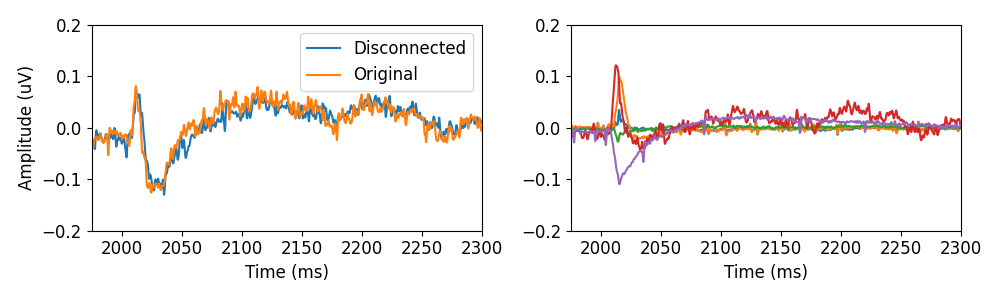

In [6]:
plt.figure(figsize=(10,3))



plt.subplot(1,2,1)
plt.plot(time,total[:,0]*1e6)
plt.plot(time,totalOriginal[:30000,0]*1e6)
plt.legend(['Disconnected','Original'])
plt.ylabel('Amplitude (uV)')
plt.xlim([1975,2300])
# # plt.gca().set_xticklabels([])
plt.ylim([-.2,.2])
# plt.title('Total signal')
plt.xlabel('Time (ms)')

plt.subplot(1,2,2)
for layer in np.arange(2,7):
    signal = 0
    for t in EEGs.keys():
        if str(layer) in t:
            try:
                signal += EEGs[t][:,0]
            except:
                pass

    plt.plot(time,signal*1e6)
    
# plt.legend(np.arange(2,7))
plt.xlim([1975,2300])
plt.ylim([-.2,.2])
# plt.ylabel('Amplitude (au)')
plt.xlabel('Time (ms)')
# plt.title('Contribution by layer')

plt.tight_layout()

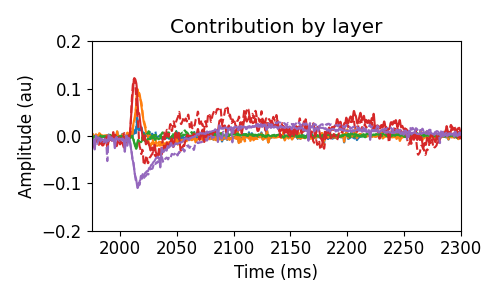

In [7]:
plt.figure(figsize=(5,3))
for layer in np.arange(2,7):
    signal = 0
    signalOriginal = 0
    for t in EEGs.keys():
        if str(layer) in t:
            try:
                signal += EEGs[t][:,0]*1e6
                signalOriginal += EEGsOriginal[t][:30000,0]*1e6
            except:
                pass

    plt.plot(time,signal,c='C'+str(layer-2))
    plt.plot(time,signalOriginal,'--',c='C'+str(layer-2))
    
# plt.legend(np.arange(2,7))
plt.xlim([1975,2300])
plt.ylim([-.2,.2])
plt.ylabel('Amplitude (au)')
plt.xlabel('Time (ms)')
plt.title('Contribution by layer')
plt.tight_layout()

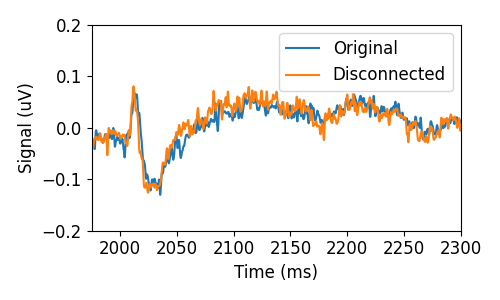

In [8]:
plt.figure(figsize=(5,3))

plt.plot(time,total[:,0]*1e6)
plt.plot(time,totalOriginal[:30000,0]*1e6)

plt.xlim([1975,2300])
plt.legend(['Original','Disconnected'])
plt.xlabel('Time (ms)')
plt.ylabel('Signal (uV)')
plt.ylim([-.2,.2])
plt.tight_layout()
plt.show()

In [9]:
def getHistByLayer(path_to_sims):

   

    spikes_by_layer = []
    bins_by_layer = []

    for layer in np.arange(1,7):

        for sim in range(10):

            s = bp.Simulation( path_to_sims + '/'+str(sim)+'/simulation_config.json' )

            if sim == 0:
                c = s.circuit
                layerDF = list(c.nodes.get(group='hex_O1',properties=['layer']))[0][1].loc['S1nonbarrel_neurons']

                spikes = s.spikes['S1nonbarrel_neurons'].get(t_start=1975,t_stop=2200)
            else:
                spikes = pd.concat( (spikes, s.spikes['S1nonbarrel_neurons'].get(t_start=1975,t_stop=2200) ) )

        layerIds = list(layerDF[layerDF['layer']==layer].index)

        spikes_layer = spikes[np.isin(spikes,layerIds)]


        spike_hist,bins = np.histogram(list(spikes_layer.index))

        bins = (bins[:-1]+bins[1:])/2

        
        spikes_by_layer.append(spike_hist)
        bins_by_layer.append(bins)

    return spikes_by_layer, bins_by_layer
        

In [11]:
import bluepysnap as bp

s ='../original/1a8bf077-4f6c-4bcb-b257-ca1f3d2388cd/'
s1 = '../rewired/f090d92c-29b1-4033-96d2-e1a67b33dab6/'
s2 = 'd851ea52-d571-420f-bd23-d77489af0fac/'

spikes_original, bins_original = getHistByLayer(s)
spikes_rewired, bins_rewired = getHistByLayer(s1)
spikes_disconnected, bins_disconnected = getHistByLayer(s2)

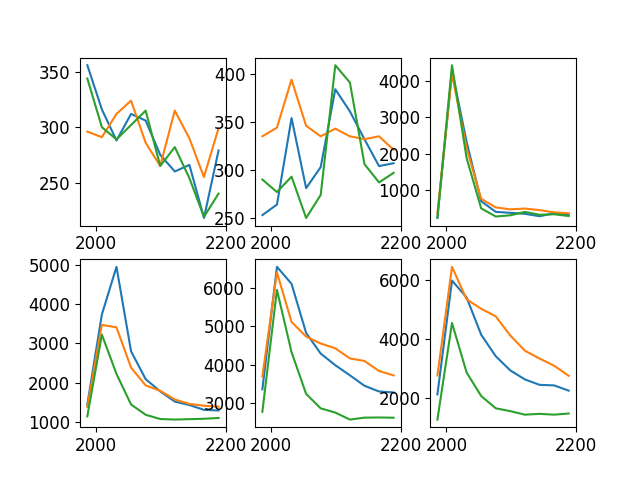

In [12]:
fig = plt.figure()
for i in np.arange(1,7):
    plt.subplot(2,3,i)
    plt.plot(bins_original[i-1],spikes_original[i-1])
    plt.plot(bins_rewired[i-1],spikes_rewired[i-1])
    plt.plot(bins_disconnected[i-1],spikes_disconnected[i-1])
    plt.xlim([1975,2200])